In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [4]:
import pandas as pd

train_data = pd.read_csv("./train_dataset_1007.csv")
test_data = pd.read_csv("./test_dataset_1007.csv")

In [5]:
%matplotlib inline
import matplotlib.pyplot as pyplot

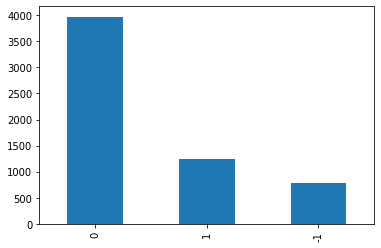

In [6]:
train_data['label'].value_counts().plot(kind='bar')

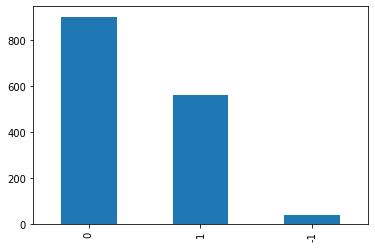

In [12]:
test_data['label'].value_counts().plot(kind='bar')

In [15]:
print(train_data.groupby('label').size().reset_index(name='count'))
print(test_data.groupby('label').size().reset_index(name='count'))

   label  count
0     -1    791
1      0   3971
2      1   1238
   label  count
0     -1     40
1      0    900
2      1    560


In [16]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [25]:
import konlpy
from konlpy.tag import Okt
okt = Okt()
X_train = []
for sentence in train_data['title']:
  temp_X =[]
  temp_X = okt.morphs(sentence, stem=True) #토큰화
  temp_X = [word for word in temp_X if not word in stopwords] #안쓰는 말 제거
  X_train.append(temp_X)

X_test = []
for sentence in test_data['title']:
  temp_X =[]
  temp_X = okt.morphs(sentence, stem=True) #토큰화
  temp_X = [word for word in temp_X if not word in stopwords] #안쓰는 말 제거
  X_test.append(temp_X)

In [26]:
print(X_train[:3])

[['버거킹', '바삭', '신', '메뉴', '3000원', '안되다', '가격'], ['버거킹', '가을', '맞이', '와퍼주니어', '1900원', '판매'], ['귀엽다', '오싹하다', '’', '할로윈데이', '겨냥', '이색', '식', '음료', '출시']]


In [27]:
print(X_test[:3])

[['더벨맘스', '터치', '가맹', '점포', '롯데리아', '앞', '지르다', '1', '위', '우뚝'], ['롯데리아', '맘스터치', '패스트푸드', '점', '위생', '적발', '5년', '간', '50', '증가'], ['맘스', '터치', '도시락', '달', '만에', '3만', '개', '완판잘', '나가다', '치킨', '프랜차이즈', '간편식']]


In [29]:
from re import X
from keras.preprocessing.text import Tokenizer
max_words = 35000
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [30]:
print(X_train[:3])

[[1, 172, 68, 15, 1755, 1756, 30], [1, 541, 178, 66, 215, 22], [2433, 4299, 2, 982, 1073, 317, 216, 270, 12]]


In [31]:
print(X_test[:3])

[[407, 27, 1676, 93, 736, 2586, 70, 43, 2761], [93, 87, 55, 3171, 2109, 1305, 117, 184, 1288], [429, 407, 1687, 147, 135, 29, 1822, 78, 84, 1311]]


In [51]:
print("제목의 최대 길이 : ", max(len(I) for I in X_train))
print("제목의 평균 길이 : ", sum(map(len, X_train))/len(X_train))

제목의 최대 길이 :  20
제목의 평균 길이 :  20.0


In [52]:
print("제목의 최대 길이 : ", max(len(I) for I in X_test))
print("제목의 평균 길이 : ", sum(map(len, X_test))/len(X_test))

제목의 최대 길이 :  20
제목의 평균 길이 :  20.0


In [59]:
import numpy as np

y_train = []
y_test = []

for i in range(len(train_data['label'])):
  if train_data['label'].iloc[i]==1:
    y_train.append([0,0,1])
  elif train_data['label'].iloc[i]==0:
     y_train.append([0,1,0]) 
  elif train_data['label'].iloc[i]== -1:
     y_train.append([1,0,0]) 


for i in range(len(test_data['label'])):
  if test_data['label'].iloc[i]==1:
    y_test.append([0,0,1])
  elif test_data['label'].iloc[i]==0:
     y_test.append([0,1,0]) 
  elif test_data['label'].iloc[i]== -1:
     y_test.append([1,0,0]) 

y_train = np.array(y_train)
y_test = np.array(y_test)

In [60]:
y_train

array([[0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [61]:
y_test

array([[0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [62]:
#모델 만들기, 모든 데이터의 길이를 20으로 통일

from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
max_len = 20

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [63]:
model = Sequential()
model.add(Embedding(max_words, 100))
model.add(LSTM(128))
model.add(Dense(3, activation = 'softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.1)

Epoch 1/10
540/540 [==============================] - 38s 64ms/step - loss: 0.3710 - accuracy: 0.8654 - val_loss: 0.1633 - val_accuracy: 0.9583
Epoch 2/10
540/540 [==============================] - 38s 71ms/step - loss: 0.0420 - accuracy: 0.9880 - val_loss: 0.1691 - val_accuracy: 0.9650
Epoch 3/10
540/540 [==============================] - 31s 58ms/step - loss: 0.0098 - accuracy: 0.9967 - val_loss: 0.1932 - val_accuracy: 0.9667
Epoch 4/10
540/540 [==============================] - 40s 74ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.1951 - val_accuracy: 0.9650
Epoch 5/10
540/540 [==============================] - 33s 60ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.1717 - val_accuracy: 0.9633
Epoch 6/10
540/540 [==============================] - 35s 66ms/step - loss: 0.0073 - accuracy: 0.9985 - val_loss: 0.1532 - val_accuracy: 0.9617
Epoch 7/10
540/540 [==============================] - 31s 57ms/step - loss: 0.0024 - accuracy: 0.9991 - val_loss: 0.1846 - val_accuracy:

In [64]:
print("\n 테스트 정확도 : {:.2f}%".format(model.evaluate(X_test, y_test)[1]*100))

47/47 [==============================] - 2s 9ms/step - loss: 0.2375 - accuracy: 0.9640

 테스트 정확도 : 96.40%


In [65]:
model2 = Sequential()
model2.add(Embedding(max_words, 100))
model2.add(LSTM(128))
model2.add(Dense(3, activation = 'softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
history = model2.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.1)

Epoch 1/10
540/540 [==============================] - 35s 58ms/step - loss: 0.3697 - accuracy: 0.8628 - val_loss: 0.1653 - val_accuracy: 0.9583
Epoch 2/10
540/540 [==============================] - 30s 56ms/step - loss: 0.0441 - accuracy: 0.9876 - val_loss: 0.1677 - val_accuracy: 0.9583
Epoch 3/10
540/540 [==============================] - 29s 54ms/step - loss: 0.0058 - accuracy: 0.9989 - val_loss: 0.2674 - val_accuracy: 0.9167
Epoch 4/10
540/540 [==============================] - 29s 54ms/step - loss: 0.0062 - accuracy: 0.9983 - val_loss: 0.2071 - val_accuracy: 0.9500
Epoch 5/10
540/540 [==============================] - 30s 55ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.1964 - val_accuracy: 0.9717
Epoch 6/10
540/540 [==============================] - 29s 54ms/step - loss: 0.0082 - accuracy: 0.9974 - val_loss: 0.1888 - val_accuracy: 0.9567
Epoch 7/10
540/540 [==============================] - 29s 54ms/step - loss: 0.0025 - accuracy: 0.9998 - val_loss: 0.2048 - val_accuracy:

In [66]:
print("\n 테스트 정확도 : {:.2f}%".format(model2.evaluate(X_test, y_test)[1]*100))

47/47 [==============================] - 1s 11ms/step - loss: 0.2956 - accuracy: 0.9540

 테스트 정확도 : 95.40%


In [67]:
predict = model.predict(X_test)

In [69]:
predict_labels = np.argmax(predict,axis=1)
original_labels = np.argmax(y_test, axis=1)

In [70]:
for i in range(30):
  print("기사제목 : ", test_data['title'].iloc[i], "/\t 원래 라벨 : ", original_labels[i], "/\t예측한 라벨 : ",predict_labels[i])

기사제목 :  더벨맘스터치 가맹점포 롯데리아 앞질러1위 우뚝 /	 원래 라벨 :  2 /	예측한 라벨 :  2
기사제목 :  롯데리아도 맘스터치도 패스트푸드점 위생적발 5년간 50 증가 /	 원래 라벨 :  2 /	예측한 라벨 :  0
기사제목 :  맘스터치 도시락 한 달만에 3만개 완판잘 나가는 치킨 프랜차이즈 간편식 /	 원래 라벨 :  1 /	예측한 라벨 :  1
기사제목 :  맘스터치 먹고 뉴이스트 · 옹성우 · 여자친구 보러가자 /	 원래 라벨 :  1 /	예측한 라벨 :  1
기사제목 :  MTM터치 연중기획공연12세계의 음악도시 오스틴 내슈빌 아바나 /	 원래 라벨 :  1 /	예측한 라벨 :  1
기사제목 :  기로에 선 자영업자 그래도 해법은 있다 /	 원래 라벨 :  1 /	예측한 라벨 :  1
기사제목 :  단독 지금도 맥도날드서 벌레·이물질 줄줄줄반년새 21건 포스팅 충격 /	 원래 라벨 :  0 /	예측한 라벨 :  0
기사제목 :  엄지족 잡아라패스트푸드도 배달 경쟁 가세 /	 원래 라벨 :  1 /	예측한 라벨 :  1
기사제목 :  더벨강소 외식프랜차이즈 리포트해마로푸드 가격·품질 두마리 토끼 잡 /	 원래 라벨 :  1 /	예측한 라벨 :  1
기사제목 :  맘스터치 펩시 콘서트 입장권 증정 이벤트 /	 원래 라벨 :  1 /	예측한 라벨 :  1
기사제목 :  국내서 1위 쫓는 해마로푸드서비스 맘스터치’해외 사업은 지지부진 /	 원래 라벨 :  2 /	예측한 라벨 :  2
기사제목 :  붐바타 창업박람회 참가제2의 맘스터치 시동건다 /	 원래 라벨 :  1 /	예측한 라벨 :  1
기사제목 :  해마로푸드 붐바타로 제2의 맘스터치 시동건다 /	 원래 라벨 :  1 /	예측한 라벨 :  1
기사제목 :  맘스터치 군대스리가 예비군편’ 추가 진행 /	 원래 라벨 :  1 /	예측한 라벨 :  1
기사제목 :  맘스터치 뉴미디어 통해 기부나눔 알리다 /	 원래 라벨 :  2 /	예측한 라벨 :  2
기사제목 :  맘스터치 필리핀 진출